# Visão computacional

## Detecção de faces

In [ ]:
import cv2 # OpenCV

In [ ]:
imagem = cv2.imread('/content/workplace-1245776_1920.jpg')

In [ ]:
#cv2.imshow(imagem)
from google.colab.patches import cv2_imshow
cv2_imshow(imagem)

In [ ]:
detector_face = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

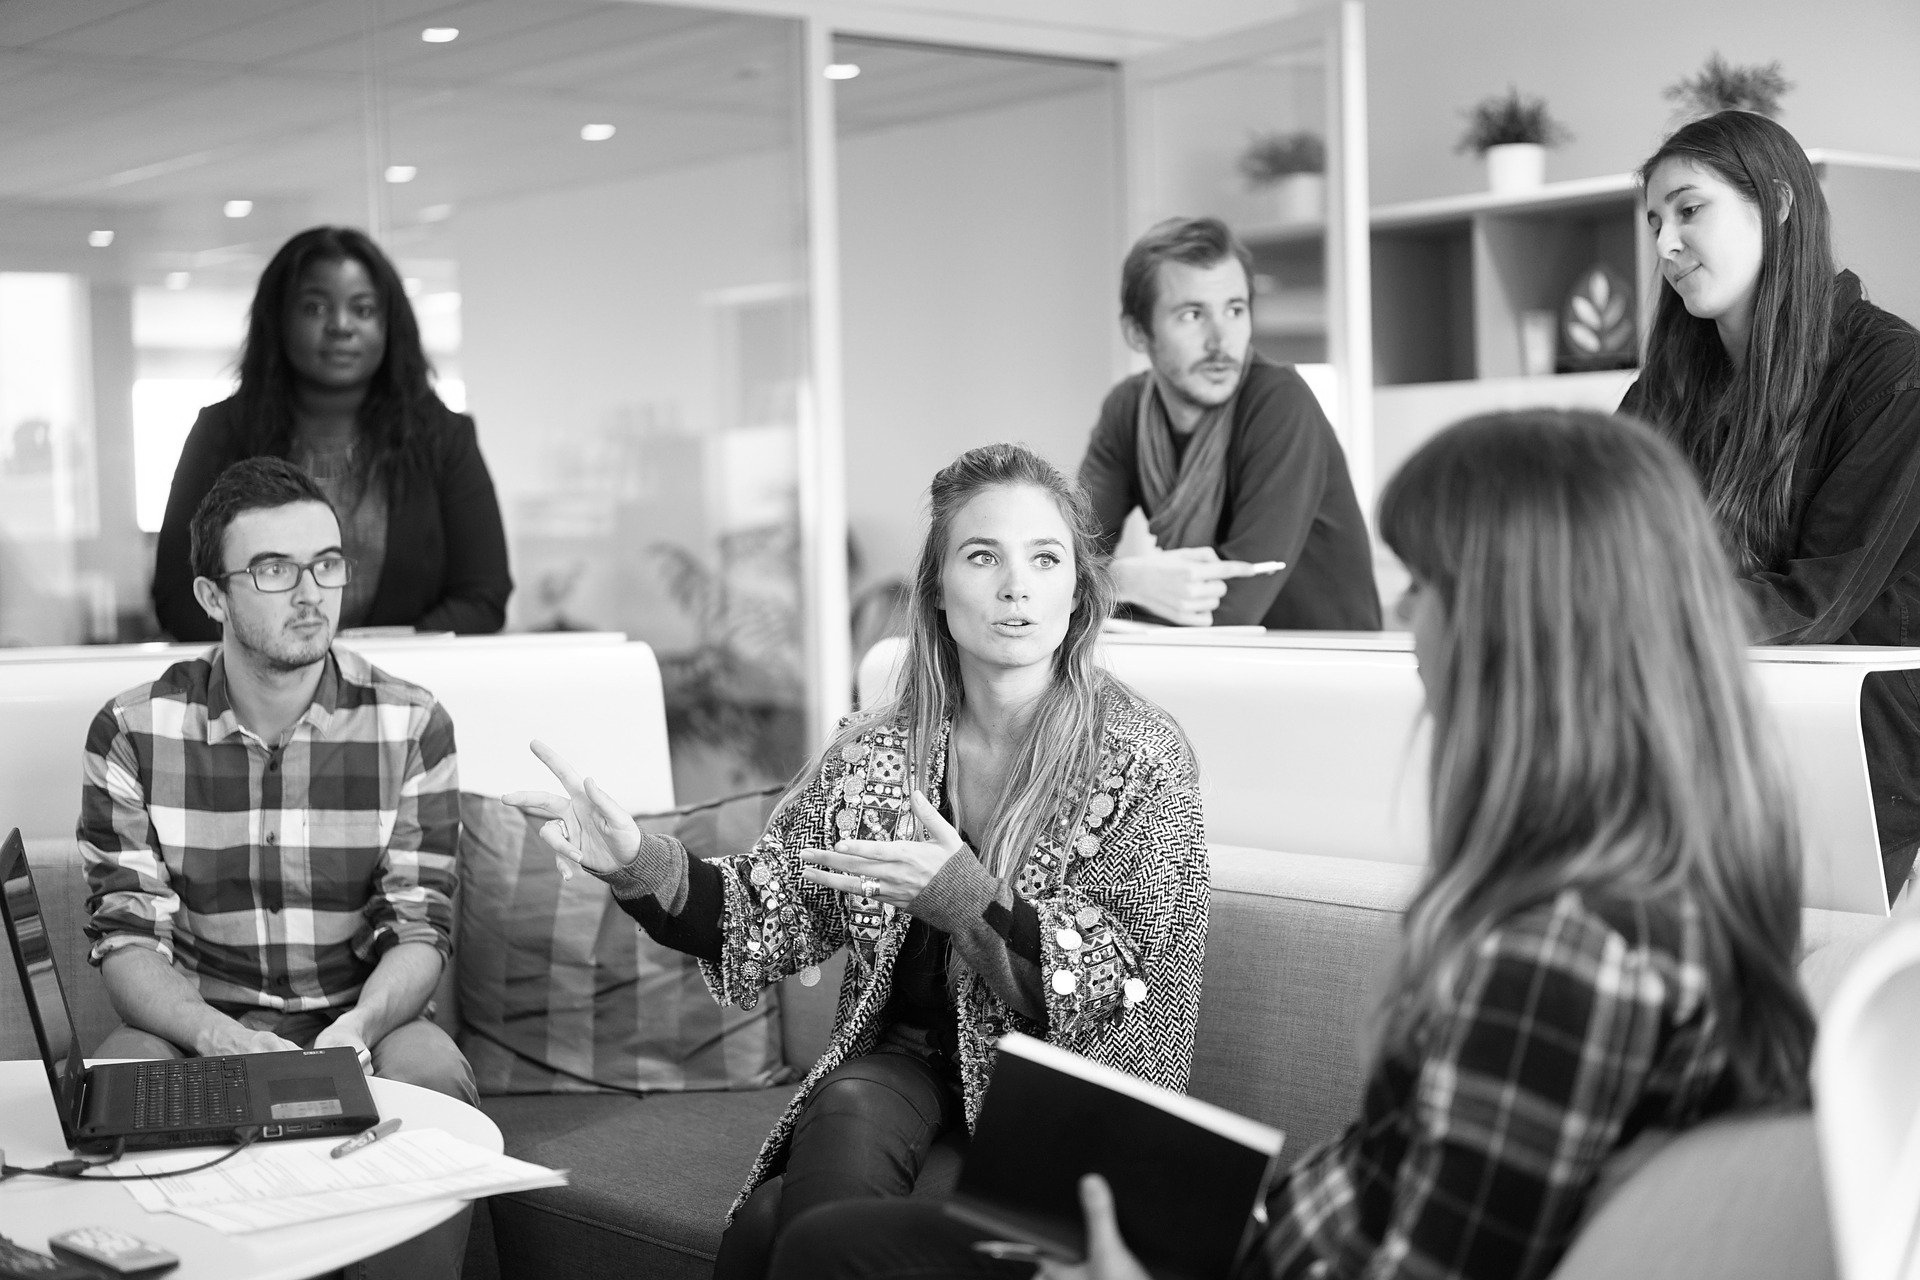

In [ ]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_cinza)

In [ ]:
deteccoes = detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.3, minSize=(30,30))

In [ ]:
deteccoes

array([[1635,  156,  147,  147],
       [ 284,  262,  114,  114],
       [1149,  260,  129,  129],
       [ 928,  491,  171,  171],
       [ 222,  507,  151,  151]], dtype=int32)

In [ ]:
len(deteccoes)

5

In [ ]:
for (x, y, l, a) in deteccoes:
  #print(x, y, l, a)
  cv2.rectangle(imagem, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(imagem)

## Detecção do corpo

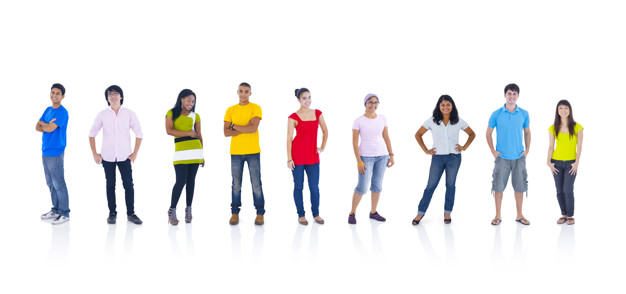

In [ ]:
image = cv2.imread('/content/pessoas.jpg')
cv2_imshow(image)

8
[[461  60  92 184]
 [195  47  96 192]
 [266  80  75 151]
 [ 70  57  95 189]
 [532 103  66 133]
 [327  69  84 169]
 [144 100  71 142]
 [ 12  66  90 180]]


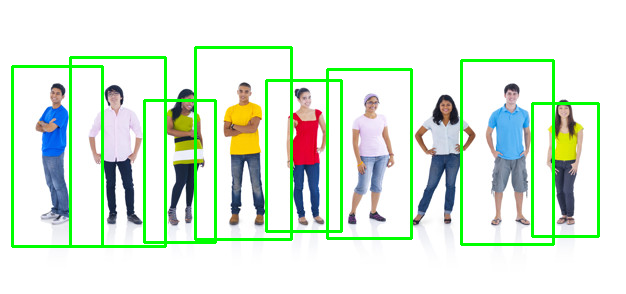

In [ ]:
detector_corpo = cv2.CascadeClassifier('/content/fullbody.xml')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = detector_corpo.detectMultiScale(image_gray, scaleFactor=1.1, minSize=(50,50))
print(len(detections))
print(detections)
for (x, y, l, a) in detections:
  cv2.rectangle(image, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(image)

## Reconhecimento facial

### Treinamento

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import zipfile
path = '/content/drive/My Drive/Cursos - recursos/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import os
os.listdir('/content/yalefaces/treinamento')

In [ ]:
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/treinamento', f) for f in os.listdir('/content/yalefaces/treinamento')]
  faces = []
  ids = []
  for caminho in caminhos:
    if caminho == '/content/yalefaces/treinamento/.ipynb_checkpoints':
      continue
    imagem = Image.open(caminho).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [ ]:
ids, faces = dados_imagem()

In [ ]:
print(ids)

[10  6  8  4 12  9  7  4  3 15 11 13  4  9  4 10  4  1 10 11 12  5  3 10
  8  5  5  2  1 14 15  2 10  5  2 13 14  3  6  6 15 10  1  1 15  4 15 11
  9 11  6  8 11  8  6 12 13 15  7  5  3  2  5 13  5 11 13 13 14 12  5 14
  1 11 14  4  6  8  6 15  3 14  2 12  2  9  7  3  3 13 10  9  3  8  6  2
 13  1 14  7 12 11 12 12  4 15 12 15  3  9 14  6  2 10  2  4 14 11  1  7
 13  5  9  9  7  9  7  7  7 10  8  8  8]


In [ ]:
print(faces[0])

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 230 251 248]
 [255 255 255 ... 221 225 243]
 [ 68  68  68 ...  68  68  68]]


In [ ]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

### Classificação

In [ ]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/classificadorLBPH.yml')

In [ ]:
imagem_teste = '/content/yalefaces/teste/subject10.sad.gif'

In [ ]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 241 255 255]
 [255 255 255 ... 234 237 252]
 [ 68  68  68 ...  68  68  68]]


In [ ]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto

10

In [ ]:
idcorreto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
idcorreto

10

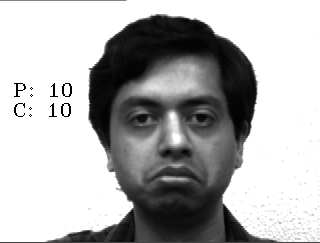

In [ ]:
cv2.putText(imagem_np, 'P: ' + str(idprevisto), (x,y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'C: ' + str(idcorreto), (x,y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)